# 1D -REGRESSION( Training only 1 parameter)

#Creating Criterion function using MSE

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#class plot_diagram is used to visualize the data space and the parameter space
class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

In [15]:
# Import the library PyTorch

import torch

Values from -3 to 3 is generated that a creates an estimated line with a slope of -3

In [17]:
# f(X) with a slope of -3

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

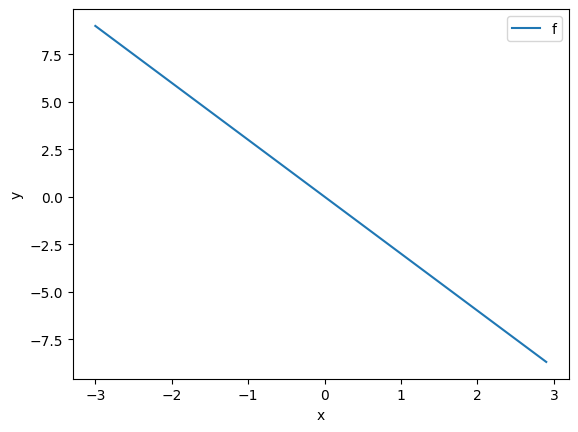

In [18]:
# Plotting the line with blue

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Adding some noise tio the data for simulating the real data 

In [19]:
# Add some noise to f(X) and save it in Y

Y = f + 0.1 * torch.randn(X.size())

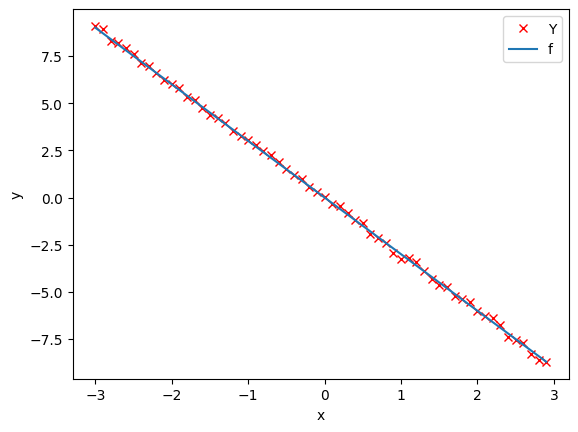

In [20]:
# Plot the data points of Y 

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Create Model and cost function (Total Loss)

In [21]:
# Create forward function for prediction

def forward(x):
    return w * x

In [22]:
# Create the MSE function to evaluate the result.

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

Learning rate lr and empty list LOSS is created to record the loss for each iteration 

In [23]:
# Create Learning Rate and an empty list to record the loss for each iteration

lr = 0.1
LOSS = []

In [24]:
w = torch.tensor(-10.0, requires_grad = True)

In [12]:
gradient_plot = plot_diagram(X, Y, w, stop = 5)  #plot diagram object is created to visualize the data space

In [25]:
# Define a function to train the model

def train_model(iter):
    for epoch in range (iter):
        
        # make the prediction as we learned in the last lab
        Yhat = forward(X)
        
        # calculate the iteration
        loss = criterion(Yhat,Y)
        
        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        # store the loss into list
        LOSS.append(loss.item())
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # updata parameters
        w.data = w.data - lr * w.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()

Text(22.472222222222214, 0.5, 'Cost')

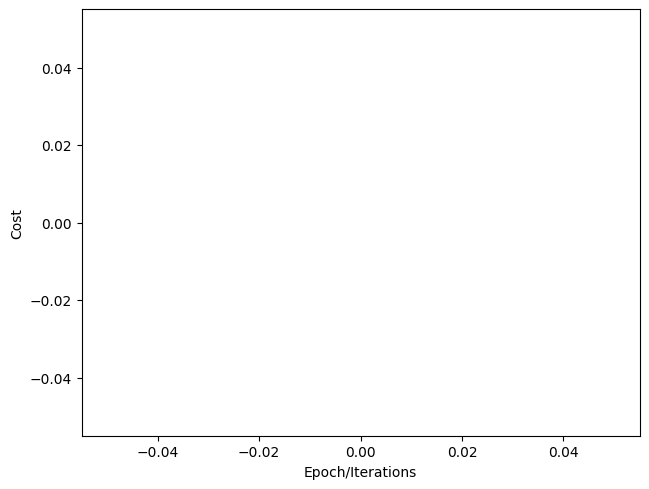

In [26]:
# Plot the loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

In [27]:
w = torch.tensor(-15.0, requires_grad=True) #Learner parameter w is created with intial value of -15.0

In [28]:
LOSS2 = []

In [29]:
gradient_plot1 = plot_diagram(X, Y, w, stop = 15)

In [30]:
#func with LOSS list 2
def my_train_model(iter):
    for epoch in range (iter):
        Yhat = forward(X)
        loss = criterion(Yhat,Y)
        gradient_plot1(Yhat, w, loss.item(), epoch)
        LOSS2.append(loss)
        loss.backward()
        w.data = w.data - lr * w.grad.data
        w.grad.data.zero_()


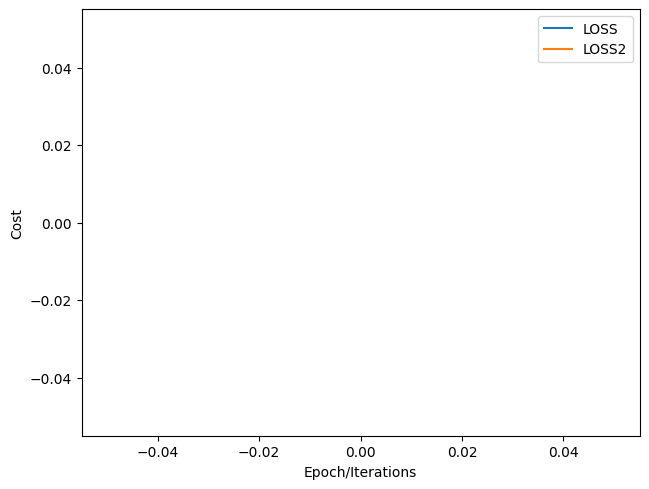

In [31]:
#overlay of the list LOSS and LOSS2
plt.plot(LOSS, label = "LOSS")
plt.plot(LOSS2, label = "LOSS2")
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")
plt.legend()